# M3 Stretch Activity 🧘

## The task 

This is an optional activity designed to consolidate and extend the knowledge that you have acquired this week.

Your task is to explore the MNIST dataset. MNIST is short for Modified National Institute of Standards and Technology database. The MNIST dataset is a large database of handwritten digits and is commonly used for training various image processing systems.

Your task is as follows:

- Find a data driven analytic notebook in Kaggle regarding the MNIST dataset
- Write a short report analysing how KNN can be used in the MNIST dataset


The following report combines code and text.

## Intro to MNIST ✍️ 

The Modified National Institute of Standards and Technology database is an extensive collection of handwritten digits. Its training set has 60,000, and a test set has 10,000 samples. MNIST  images are 28 x 28 pixels, they are of handwritten digits from 0 to 9.

MNIST can be obtained from sklearn datasets and explored in the ways illustrated below.

### Obtain MNIST from sklearn 📥

In [1]:
# Import necessary modules and datasets

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the digits dataset: digits

digits = datasets.load_digits()

### Explore the built-in dataset 🧭

In [3]:
# Print the description of the dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
# See the data type of built in dataset. 

type(digits)


sklearn.utils._bunch.Bunch

A [bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html) is a Python dictionary-like data structure that provides attribute-style access.

In [5]:
# See the data type of built in dataset. Built-in data science bniches have data/target variables pre-made.

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
# What are the target values? (Target is a dependent variable)

digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualising the target distribution 📊

The histogram below shows that each number has approxiamtelly equal to eithers presence in the data set.

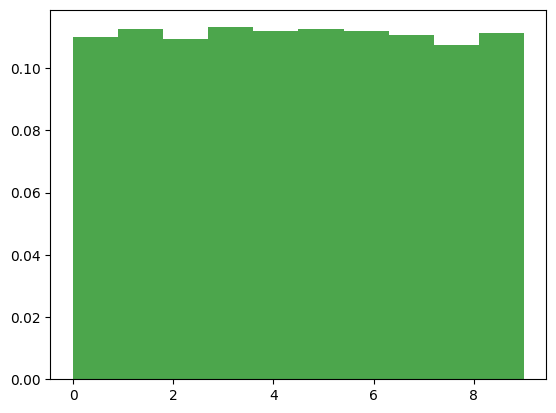

In [7]:
plt.hist(digits.target, 10, density = 1, color='g', alpha = 0.7)
plt.show()

In [8]:
# Whate are the features? Features are independent variables in Data Science

digits['feature_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

Each feature is a set of 8x8 pixels.

In [9]:
# The number of records for the featuure variable

len(digits.data)

1797

In [10]:
# The length of the first feature value

len(digits.data[0])

64

In [11]:
# The length of the last feature value

len(digits.data[1796])

64

In [12]:
digits.data[1796]

array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

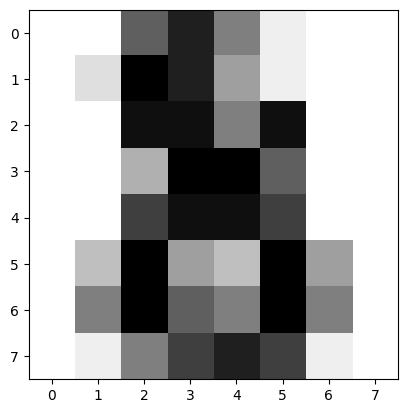

In [13]:
# Display digit 1796. You can see how it corresponds to the numbers above

plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

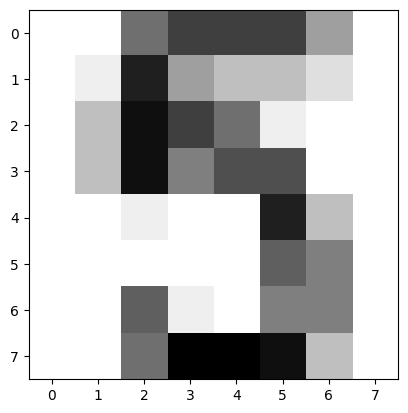

In [14]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [15]:
# The number above is clearly 5. Let us see the target

digits.target[1010],

(5,)

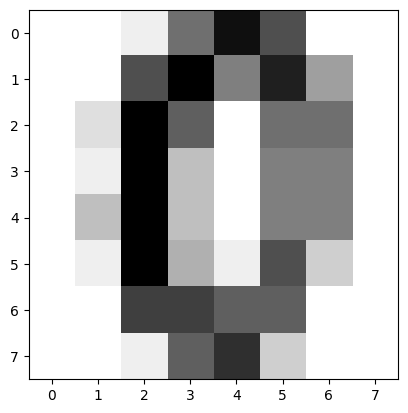

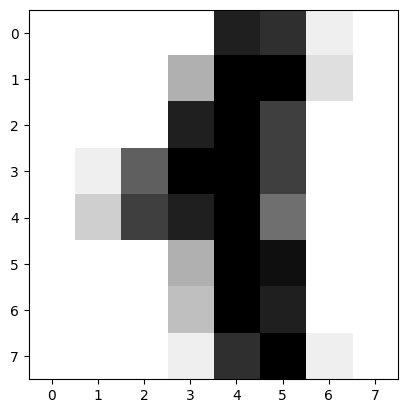

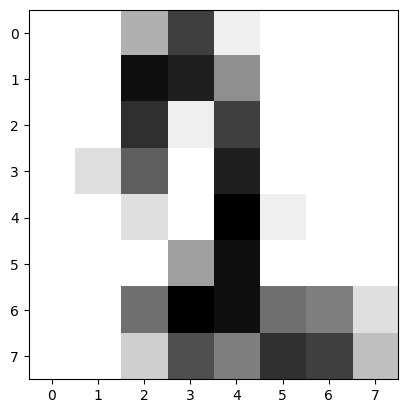

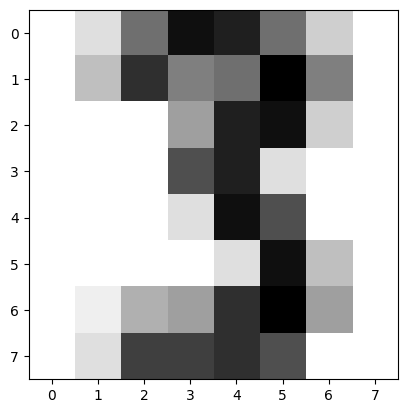

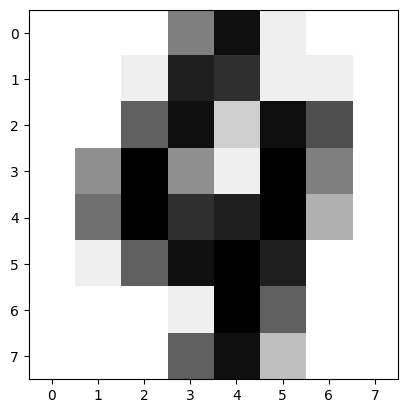

In [16]:
# Display digits 10 to 14

for i in range(10,15):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [17]:
# Print the shape of the images

digits.images.shape

(1797, 8, 8)

In [18]:
# Print the shape of the keys

print(digits.data.shape)

(1797, 64)


## KNN to classify MNIST

The k-Nearest-Neighbors algorithm or KNN is a popular Machine Learning model. One can apply KNN to supervised or unsupervised learning. It is often effective in regression, classification, clustering, or outlier detection.

KNN is often used to classify MNIST data with high accuracy. KNN classifies new data points based on similarity to their neighbor. KNN uses the number k as a parameter. k is how many nearest Neighbors to the data point being classified KNN will consider. If the value of k is five, KNN will look at the five nearest neighbors to the new data point. The data point will be labeled the same as the majority of neighbors.

KNN can be used on MNIST to clasify pixel grids into numbers they represent. 


In [19]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [20]:
# Create feature and target numpy arrays
X = digits.data
y = digits.target

In [21]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [22]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [23]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


The accuracy shown above is high. KNN works well on MNIST dataset

### Simulate a pixel grid to try predicting 🔮

It would be difficult to obtain a new hand written number in the correct format to test KNN. However, we can use exising pixel grids to make a 'fake' number grid.

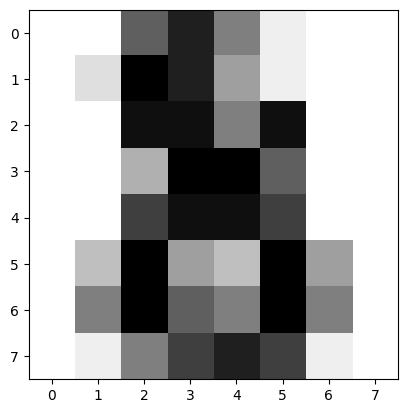

In [25]:
# This was digit number 1796, the last in features. You can see it is eight.

plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [26]:
# The output is the numpy representation of the hand written number above. 
digits.data[1796]

array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

In [27]:
# Let us test the model with a very similar numpy array but slightly modified.

knn.predict([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 14.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 13.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

array([8])

The KNN model correctly predicted 8 as an output. And that is how MNIST can be used to demonstrate KNN.

### Choosing k

In [28]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

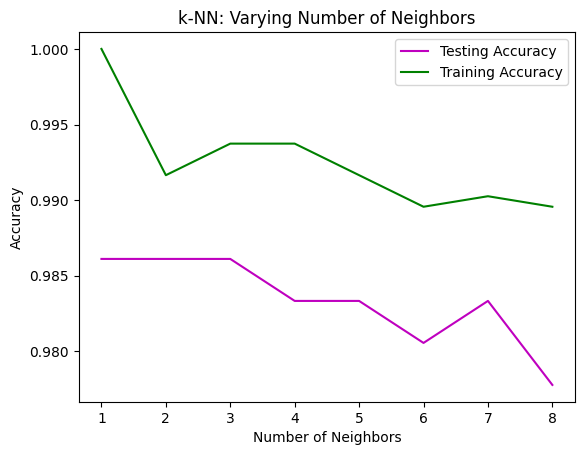

In [31]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, color='m', label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, color='g', label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b228b239-67ff-49eb-af12-e7c23b7fcf68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>